In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
pwd

'/home/dhiraj/Desktop/python/notebooks/DataScienceProjects/IIT-G applied data science, ml and edge ai/IIT_6M/08_Linear_Regression'

In [51]:
# Importing height weight csv
df = pd.read_csv('height-weight.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [52]:
#Observing first 5 rows in the dataset df
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [53]:
# To find the datatypes of each column in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [54]:
# Let's look at some statistical information about our dataframe.
df.describe() 

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [55]:
#Statistical Information about Categorical Columns
df.describe(include='object')

,Gender
count,10000
unique,2
top,Male
freq,5000


In [56]:
#Dropping "id" column as it is unique identification for each row
# df.drop(['id'], axis = 1,inplace=True)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [57]:
# Finding missing values in df
df.isnull()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [58]:
#Finding the sum of missing values 'columnwise'
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Univariate Analysis

In [59]:
#Frequency Matrix of 'Gender' column
df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

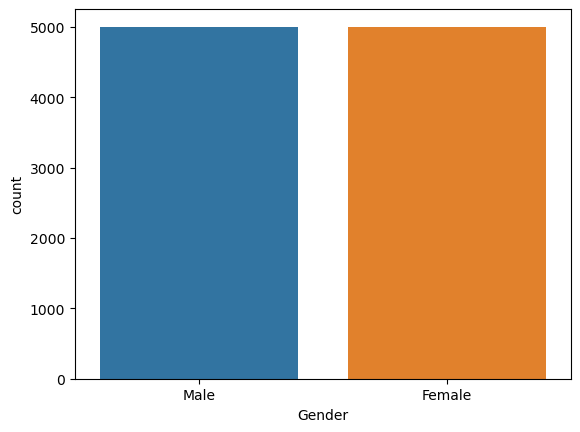

In [60]:
#Bar chart of frequency count (for Male & Female)
sns.countplot(x = 'Gender' , data = df)

In [63]:
#Finding Correlation Coeficient betweeen weight and height
df.corr()

ValueError: could not convert string to float: 'Male'

In [ ]:
#Distribution Plot for "weight"
sns.displot(df['weight'],kind='hist')

In [ ]:
#Distribution Plot for "height" column
sns.displot(df.height,kind='hist')

In [ ]:
#Skew in the distribution of 'weight' column
df['weight'].skew() #Moderately Skewed

In [ ]:
#Skew in the distribution of "height" column
df['height'].skew() #Almost Symmetric

In [ ]:
#Outlier Detection of "height" column
sns.boxplot(df['height'])

In [ ]:
#Outlier Detection of 'weight' column
sns.boxplot(df.weight)

In [ ]:
#Assigning Independent Variable "height" as 'X'
X=df['height']
X

In [ ]:
#Assigning Dependent Variable "weight" as 'y'
y=df['weight']
y

Plotting Best Fit Line Using np.polyfit

In [ ]:
#To Plot a Linear Regression (Best Fit) line on a scatter plot, using np.polyfit()
import numpy as np
plt.scatter(X,y)
m,b = np.polyfit(X, y, 1) #m = slope, b=intercept
plt.plot(X, m*X + b,'r') #We plot X & equation (m*X+b)

Creation of dummy variables

In [ ]:
#Creating list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
#Creating df of Numeric columns
df_num = df[['weight','height']]
df_num

In [ ]:
#Create a list of categorical variables
df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Convert "gender" column to "numeric" data using get_dummies
df_dummies = pd.get_dummies(df['gender'])

In [ ]:
df_dummies.tail()

In [ ]:
#Combined column wise, appending of columns
df_combined = pd.concat([df_num, df_dummies], axis=1)

In [ ]:
#Modified Data set 
df_combined.head()

In [ ]:
#Find Missing Values
df_combined.isnull().sum(axis = 0)

In [ ]:
# Putting feature variable to X (ie X = Dataset after removing Interest Rate)
X = df_combined.drop('weight', axis= 1)

In [ ]:
# Putting response variable to y
y = df_combined['weight']

In [ ]:
X 

In [ ]:
y

Splitting the data in Training and Test set
Using sklearn we split 70% of our data into training set and rest in test set.
Setting random_state will give the same training and test set everytime on running the code.

In [ ]:
#Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

Performing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

In [ ]:
# fit the model to the training data
lm.fit(X_train,y_train)

Step 5 : Model Evaluation

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
# print the intercept
print(lm.coef_)

In [ ]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

In [ ]:
sns.scatterplot(df_combined['F'],df_combined['weight'])

In [ ]:
# Making predictions using the model
y_pred = lm.predict(X_test)
print(y_pred)

In [ ]:
#Model Performance Metrics
#Coefficient of Determination (R square)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared



In [ ]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1